In [1]:
from tock import *

# Context-free grammars

You can create a CFG either by reading from a file (using `Grammar.from_file`) or a list of strings (using `Grammar.from_lines`). The first rule's left-hand side is assumed to be the start symbol.

In [2]:
g = Grammar.from_lines(["S -> a T b",
                        "S -> b",
                        "T -> T a",
                        "T -> &"])

To convert to a PDA using a top-down construction, use the `from_grammar` function:

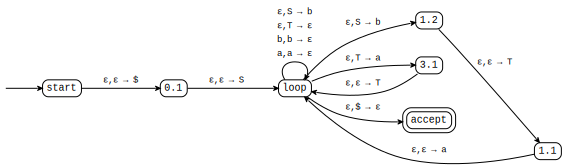

In [3]:
m = from_grammar(g)
to_graph(m)

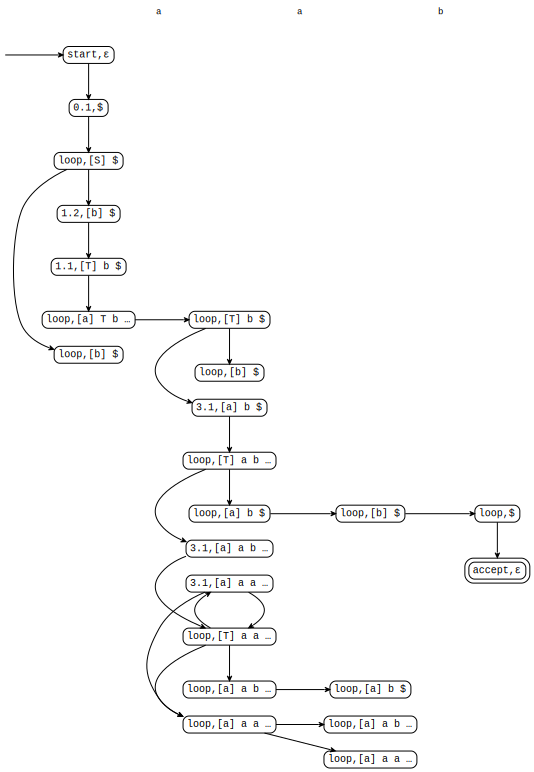

In [4]:
run(m, "a a b")

This diagram is a little hard to read, but one thing to note is the cycle between `loop` and `3.1`. This is caused by the left-recursive rule `T -> T a`, which the automaton applies an unbounded number of times.

There's also a bottom-up version

The conversion in the reverse direction, from PDA to CFG, is actually related to the algorithm that Tock uses internally to simulate PDAs. We use the `remove_useless` method to reduce the size of the converted CFG.

In [5]:
to_grammar(read_csv('../examples/sipser-2-14.csv')).remove_useless()